# Kaggle Competition: Hotel booking demand

## Setup Imports and Variables

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display

## Understand the Data

In [2]:
df = pd.read_csv('/Users/leow/Desktop/hotel_bookings.csv')

In [3]:
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

#### ~ Filtering

In [6]:
df_1 = df.copy()
df_1.drop(df_1[df_1.adr == 5400].index, inplace=True)
df_1.drop(df_1[df_1.adr == -6.38].index, inplace=True)

#### ~ Duplicate Handling

In [7]:
df_1.duplicated().value_counts()
df_1.drop_duplicates(inplace=True)

#### ~ Imputation method

In [8]:
df_1 = df_1.fillna(df.mean()).fillna(df.mode().iloc[0])

/var/folders/d8/v3brcq6x4cs2dsp_gd6nt9rr0000gn/T/ipykernel_20846/2930754271.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_1 = df_1.fillna(df.mean()).fillna(df.mode().iloc[0])


## Exlplore the Data

In [9]:
df_1.groupby(['is_canceled']).describe()

lead_time                                                        \
                count        mean        std  min   25%   50%    75%    max   
is_canceled                                                                   
0             63370.0   70.097617  81.628859  0.0   7.0  38.0  110.0  737.0   
1             24024.0  105.722194  91.878118  0.0  32.0  80.0  158.0  629.0   

            arrival_date_year               ... required_car_parking_spaces  \
                        count         mean  ...                         75%   
is_canceled                                 ...                               
0                     63370.0  2016.173095  ...                         0.0   
1                     24024.0  2016.308400  ...                         0.0   

                 total_of_special_requests                                     \
             max                     count      mean       std  min  25%  50%   
is_canceled                                                                     
0            8.0                   63370.0  0.760328  0.849905  0.0  0.0  1.0   
1            0.0                   24024.0  0.535714  0.758895  0.0  0.0  0.0   

                       
             75%  max  
is_canceled            
0            1.0  5.0  
1            1.0  5.0  

[2 rows x 152 columns]

#### 1. Yearly-based Relationship - Seperated

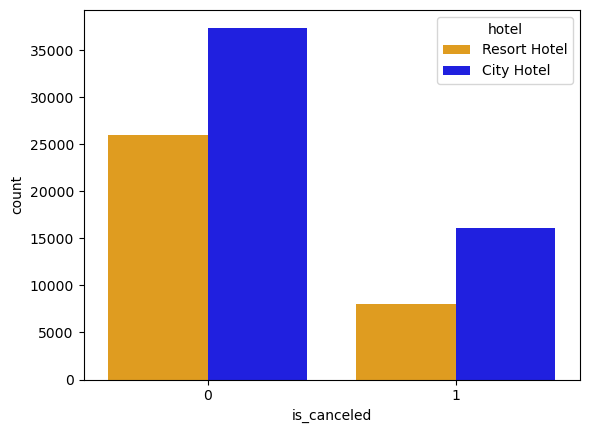

In [10]:
sns.countplot(data=df_1, x='is_canceled',hue='hotel', palette=["orange",'blue'])
df_1_hotel1 = df_1[df_1.hotel=='Resort Hotel'].groupby(['is_canceled']).count().iloc[:,0]
df_1_hotel2 = df_1[df_1.hotel=='City Hotel'].groupby(['is_canceled']).count().iloc[:,0]

> City Hotel has a higher cancellation rate than Resort Hotel.

#### 2. Lead_time - Cancel Relationship

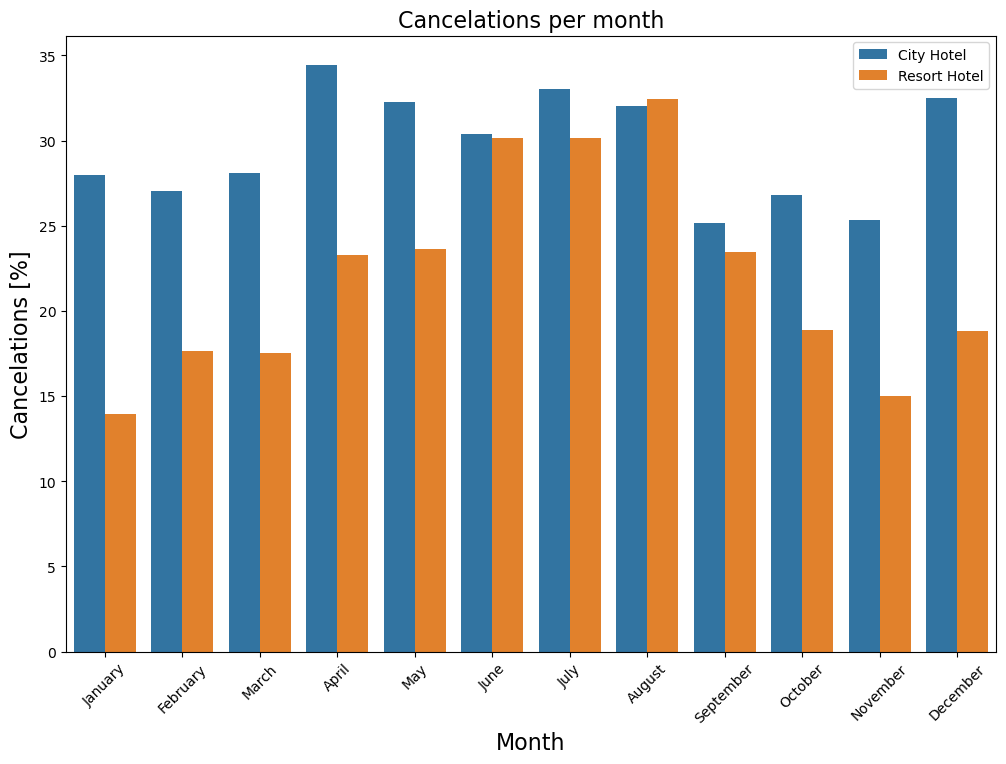

In [11]:
# Create a DateFrame with the relevant data:
res_book_per_month = df_1.loc[(df_1["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["hotel"].count()
res_cancel_per_month = df_1.loc[(df_1["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

cty_book_per_month = df_1.loc[(df_1["hotel"] == "City Hotel")].groupby("arrival_date_month")["hotel"].count()
cty_cancel_per_month = df_1.loc[(df_1["hotel"] == "City Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

res_cancel_data = pd.DataFrame({"Hotel": "Resort Hotel",
                                "Month": list(res_book_per_month.index),
                                "Bookings": list(res_book_per_month.values),
                                "Cancelations": list(res_cancel_per_month.values)})
cty_cancel_data = pd.DataFrame({"Hotel": "City Hotel",
                                "Month": list(cty_book_per_month.index),
                                "Bookings": list(cty_book_per_month.values),
                                "Cancelations": list(cty_cancel_per_month.values)})

full_cancel_data = pd.concat([res_cancel_data, cty_cancel_data], ignore_index=True)
full_cancel_data["cancel_percent"] = full_cancel_data["Cancelations"] / full_cancel_data["Bookings"] * 100

# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
full_cancel_data["Month"] = pd.Categorical(full_cancel_data["Month"], categories=ordered_months, ordered=True)

# show figure:
plt.figure(figsize=(12, 8))
sns.barplot(x = "Month", y = "cancel_percent" , hue="Hotel",
            hue_order = ["City Hotel", "Resort Hotel"], data=full_cancel_data)
plt.title("Cancelations per month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Cancelations [%]", fontsize=16)
plt.legend(loc="upper right")
plt.show()

#### 3. Booking_changes times - Cancel Relationship

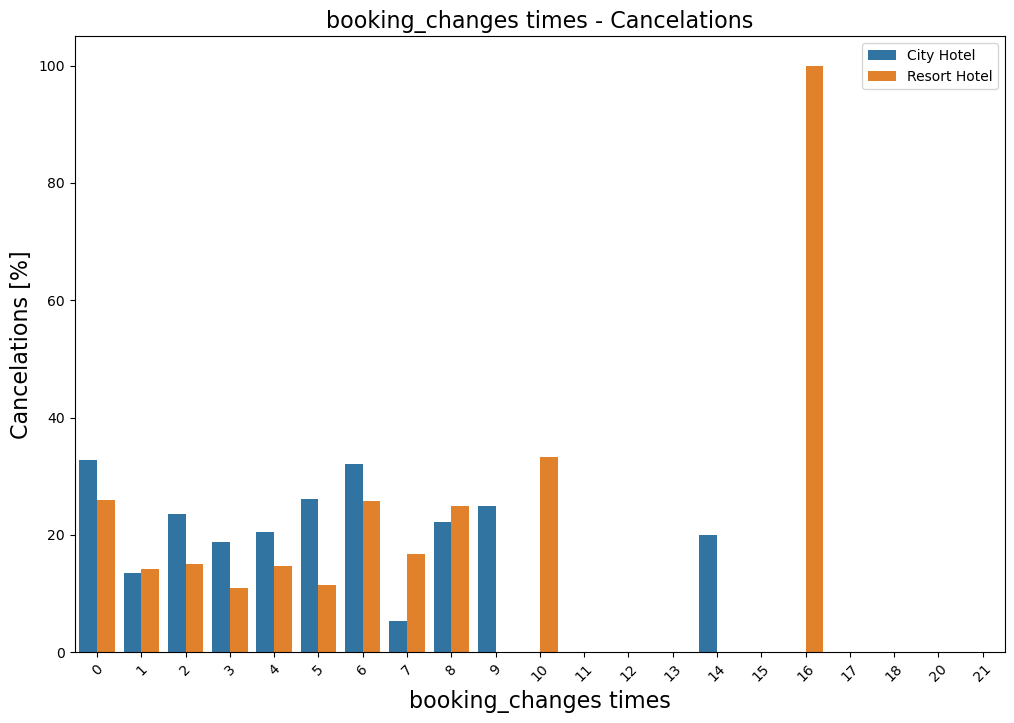

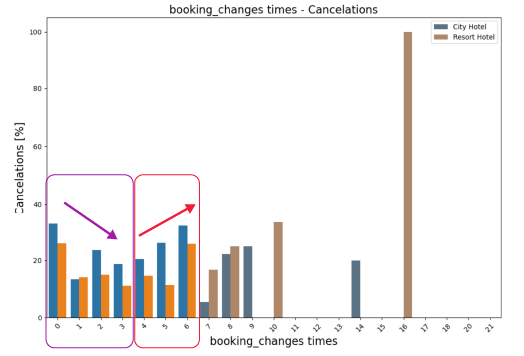

In [12]:
res_book_c_c = df_1.loc[(df_1["hotel"] == "Resort Hotel")].groupby('booking_changes')["hotel"].count()
res_cancel_c_c = df_1.loc[(df_1["hotel"] == "Resort Hotel")].groupby('booking_changes')["is_canceled"].sum()

cty_book_c_c = df_1.loc[(df_1["hotel"] == "City Hotel")].groupby('booking_changes')["hotel"].count()
cty_cancel_c_c = df_1.loc[(df_1["hotel"] == "City Hotel")].groupby('booking_changes')["is_canceled"].sum()

res_c_c = pd.DataFrame({"Hotel": "Resort Hotel",
                                "booking_changes_times": list(res_book_c_c.index),
                                "Bookings": list(res_book_c_c.values),
                                "Cancelations": list(res_cancel_c_c.values)})
cty_c_c = pd.DataFrame({"Hotel": "City Hotel",
                                "booking_changes_times": list(cty_book_c_c.index),
                                "Bookings": list(cty_book_c_c.values),
                                "Cancelations": list(cty_cancel_c_c.values)})

full_cancel_c_c = pd.concat([res_c_c, cty_c_c], ignore_index=True)
full_cancel_c_c["cancel_percent"] = full_cancel_c_c["Cancelations"] / full_cancel_c_c["Bookings"] * 100

# show figure:
plt.figure(figsize=(12, 8))
sns.barplot(x = "booking_changes_times", y = "cancel_percent" , hue="Hotel",
            hue_order = ["City Hotel", "Resort Hotel"], data=full_cancel_c_c)
plt.title("booking_changes times - Cancelations", fontsize=16)
plt.xlabel("booking_changes times", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Cancelations [%]", fontsize=16)
plt.legend(loc="upper right")
plt.show()
# for explaination
image_path = "Asset_1.png"
image = Image.open(image_path)
display(image)

> Over 3 times of making changes may lead to an increase of cancellation.

#### 4. Cancellations per month

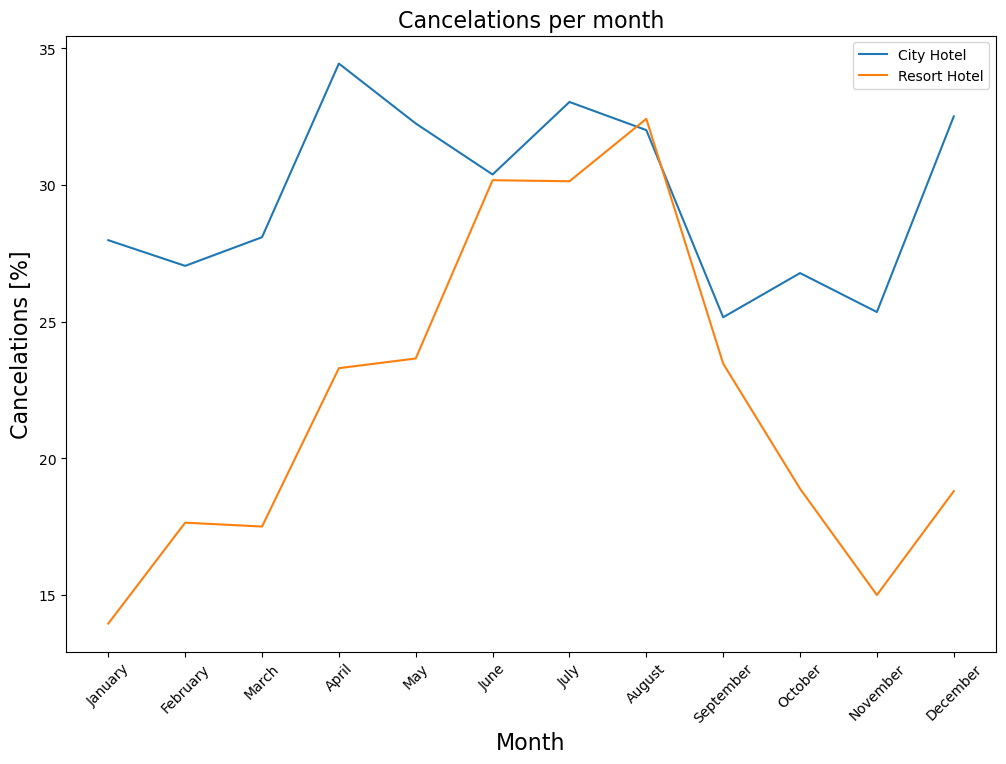

In [13]:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "Month", y = "cancel_percent" , hue="Hotel",
            hue_order = ["City Hotel", "Resort Hotel"], data=full_cancel_data)
plt.title("Cancelations per month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Cancelations [%]", fontsize=16)
plt.legend(loc="upper right")
plt.show()

> By percentage, it is obvious that City Hotel has a higher cancellation rate than Resort Hotel.

#### 5. Effect of "lead time" on cancellation

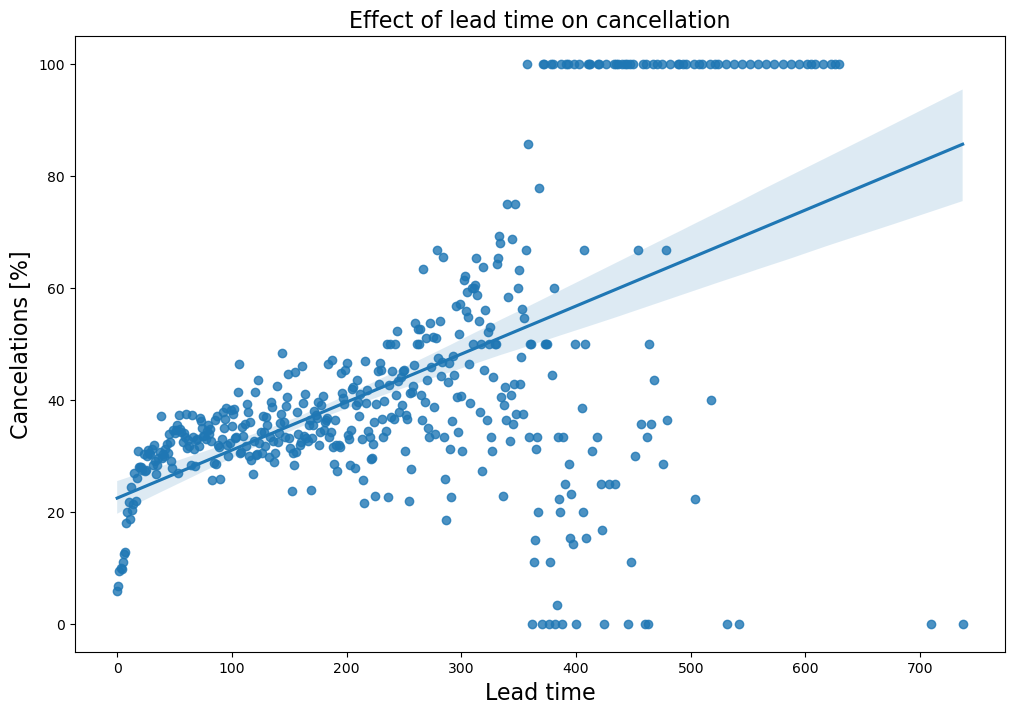

In [23]:
lead_cancel_data = df_1.groupby("lead_time")["is_canceled"].describe()
plt.figure(figsize=(12, 8))
sns.regplot(x=lead_cancel_data.index, y=lead_cancel_data["mean"].values * 100)
plt.title("Effect of lead time on cancellation", fontsize=16)
plt.xlabel("Lead time", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)
plt.show()

> Bookings made shortly before the arrival date are rarely canceled, while those made over a year in advance are frequently canceled.

#### 6. Effect of "ADR" on cancellation

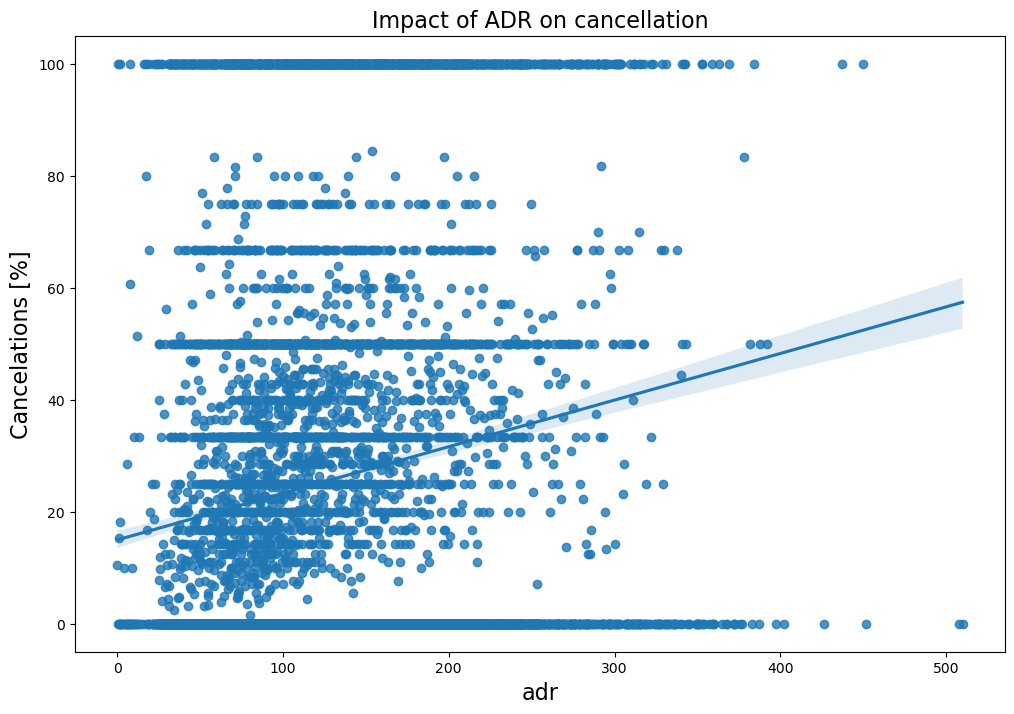

In [22]:
adr_c_data = df_1.groupby("adr")["is_canceled"].describe()
plt.figure(figsize=(12, 8))
sns.regplot(x=adr_c_data.index, y=adr_c_data["mean"].values * 100)
plt.title("Impact of ADR on cancellation", fontsize=16)
plt.xlabel("adr", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)
plt.show()

> There are more cancellations when Room rate is high

#### 7. Loyalty guest vs New guest

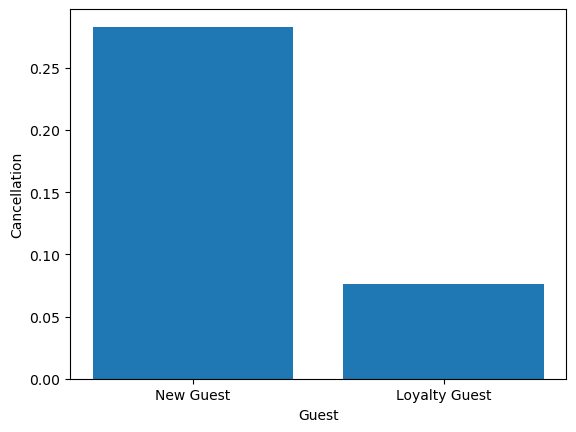

In [16]:
df_1.groupby(['is_repeated_guest','is_canceled']).count()
y_axis = [0.2829602286258633, 0.07644991212653779]
x_axis = ['New Guest', 'Loyalty Guest']

plt.bar(x_axis, y_axis)
plt.xlabel('Guest')
plt.ylabel('Cancellation')
plt.show()

> The cancellation rate for repeated guests is lower than that for new guests.

## Data Prepatation for Machine Learning

In [17]:
X_train = df_1[['hotel','lead_time', 'adr',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'reserved_room_type',
       'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type',
       'previous_cancellations','previous_bookings_not_canceled','booking_changes']] # ['assigned_room_type','required_car_parking_spaces', 'total_of_special_requests'] should be useless
y = df_1['is_canceled']
X_train_new = pd.get_dummies(X_train, columns=['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'deposit_type', 'agent',
       'company', 'customer_type'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_new, y, test_size=0.3)

### Random Forest: Training, Predicition & Evaluate Model Accuracy

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier(max_depth=None, random_state=0, bootstrap=True, ccp_alpha=0.0, criterion='gini',
                           min_samples_leaf=1,min_samples_split=2,n_estimators=100, max_samples=None,
                             oob_score=False,warm_start=False)
rfc.fit(X_train,y_train)

y_pred1_rfc = rfc.predict(X_train)
y_pred2_rfc = rfc.predict(X_test)
print('Training Acc.:',accuracy_score(y_train,y_pred1_rfc))
print('Testing Acc.:',accuracy_score(y_test,y_pred2_rfc))

Training Acc.: 0.9963874131589702
Testing Acc.: 0.7975895343071818


### Random Forest: Confusion_matrix 

In [19]:
from sklearn.metrics import confusion_matrix
rfc_m = confusion_matrix(y_test, y_pred2_rfc)

TP = rfc_m[0][0]
FP = rfc_m[0][1]
FN = rfc_m[1][0]
TN = rfc_m[1][1]

Accuracy = (TP + TN) / (TP + TN + FP + FN)
Misclassification = (FP + FN) / (TP + TN + FP + FN)
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)

print('Accuracy:',Accuracy)
print('Misclassification:',Misclassification)
print('Precision:',Precision)
print('Recall:',Recall)

Accuracy: 0.7975895343071818
Misclassification: 0.20241046569281818
Precision: 0.9092535114945552
Recall: 0.8283331735838205


## GradientBoostingClassifier: Training, Predicition & Evaluate Model Accuracy

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,
      max_depth=3, random_state=0, criterion = 'friedman_mse', init=None,
      max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=1,
      tol=0.0001, subsample=1.0, validation_fraction=0.1, 
      verbose=0, warm_start=False)
gbc.fit(X_train, y_train)
gbc.score(X_test, y_test)

y_pred1_gbc = gbc.predict(X_train)
y_pred2_gbc = gbc.predict(X_test)
print('Training Acc.:',accuracy_score(y_train,y_pred1_gbc))
print('Testing Acc.:',accuracy_score(y_test,y_pred2_gbc))

Training Acc.: 0.790175725378014
Testing Acc.: 0.783210648766162


### GradientBoostingClassifier: Confusion_matrix 

In [21]:
from sklearn.metrics import confusion_matrix
gbc_m = confusion_matrix(y_test, y_pred2_gbc)

TP = gbc_m[0][0]
FP = gbc_m[0][1]
FN = gbc_m[1][0]
TN = gbc_m[1][1]

Accuracy = (TP + TN) / (TP + TN + FP + FN)
Misclassification = (FP + FN) / (TP + TN + FP + FN)
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)

print('Accuracy:',Accuracy)
print('Misclassification:',Misclassification)
print('Precision:',Precision)
print('Recall:',Recall)

Accuracy: 0.783210648766162
Misclassification: 0.21678935123383805
Precision: 0.9378715345362723
Recall: 0.7983520666338274
